In [1]:
import os, time
import nilearn
import numpy as np
from nilearn import plotting
from nilearn.image import get_data
from nilearn.regions import Parcellations
import re

In [2]:
outdir = '/Users/jk1/temp/fmri_test/'
main_path = '/Volumes/JK/stroke_lab/ed_transfer_project/RS'

# Subject directory pattern in main dir (ex: S01_RS2)
subject_dir_pattern = re.compile("^S[0-9][0-9]_RS[0-9]$")
subject_sub_path = 'BOLD/realigned_Yeo/normalized'

n_clusters = 500

dataset = []
failed_subjects = []

In [3]:

subject_dirs = [d for d in os.listdir(main_path)
                if os.path.isdir(os.path.join(main_path, d)) and subject_dir_pattern.match(d)]
subject_dirs.sort()
subject_dirs = [os.path.join(main_path, d) for d in subject_dirs]

In [4]:
for subject_dir in subject_dirs:
    subject_sub_dir = os.path.join(subject_dir, subject_sub_path)
    if not os.path.exists(subject_sub_dir):
        failed_subjects.append(os.path.basename(subject_dir))
        continue
    subject_files = [os.path.join(subject_sub_dir, f) for f in os.listdir(subject_sub_dir) if os.path.isfile(os.path.join(subject_sub_dir, f))]
    subj_img_4d = nilearn.image.load_img(subject_files)
    # all subjects should have 480 time points
    assert subj_img_4d.shape[-1] == 480
    dataset.append(subj_img_4d)

(63, 76, 63)


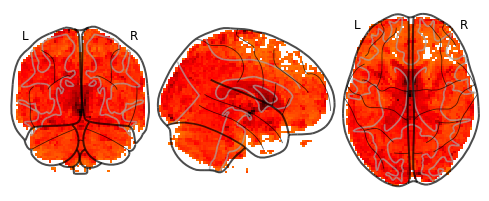

In [5]:
first_vol = nilearn.image.index_img(dataset[0], 0)
print(first_vol.shape)
plotting.plot_glass_brain(first_vol)

## Parcellation


In [6]:
# Computing ward for the first time, will be long... This can be seen by
# measuring using time
start = time.time()

# Agglomerative Clustering: ward

# We build parameters of our own for this object. Parameters related to
# masking, caching and defining number of clusters and specific parcellations
# method.
ward = Parcellations(method='ward', n_parcels=n_clusters,
                     standardize=False, smoothing_fwhm=2.,
                     memory='nilearn_cache', memory_level=1,
                     verbose=1)
# Call fit on functional dataset: single subject (less samples).
ward.fit(dataset)
print("Ward agglomeration 1000 clusters: %.2fs" % (time.time() - start))

[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(63, 76, 63, 480),
affine=array([[  -2.5,    0. ,    0. ,   78. ],
       [   0. ,    2.5,    0. , -112. ],
       [   0. ,    0. ,    2.5,  -70. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(63, 76, 63, 480),
affine=array([[  -2.5,    0. ,    0. ,   78. ],
       [   0. ,    2.5,    0. , -112. ],
       [   0. ,    0. ,    2.5,  -70. ],
       [   0. ,    0. ,    0. , 
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(63, 76, 63, 480),
affine=array([[  -2.5,    0. ,    0. ,   78. ],
       [   0. ,    2.5,    0. , -112. ],
       

/Users/jk1/opt/anaconda3/envs/hand_transfer_ed/lib/python3.8/site-packages/nilearn/_utils/cache_mixin.py:295: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "
/Users/jk1/opt/anaconda3/envs/hand_transfer_ed/lib/python3.8/site-packages/nilearn/input_data/nifti_masker.py:398: UserWarning: Persisting input arguments took 0.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  data = self._cache(filter_and_mask,
/Users/jk1/opt/anaconda3/envs/hand_transfer_ed/lib/python3.8/site-packages/nilearn/input_data/nifti_masker.py:398: UserWarning: Persisting input arguments took 0.72s to 

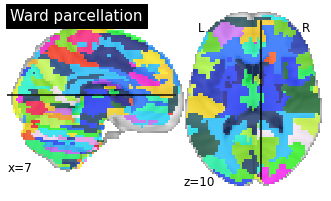

In [7]:
ward_labels_img = ward.labels_img_

# # Now, ward_labels_img are Nifti1Image object, it can be saved to file
# # with the following code:
ward_labels_img.to_filename(os.path.join(outdir, f'ward_parcellation_k{n_clusters}.nii.gz'))

first_plot = plotting.plot_roi(ward_labels_img, title="Ward parcellation",
                               display_mode='xz')

# Grab cut coordinates from this plot to use as a common for all plots
cut_coords = first_plot.cut_coords

[Parcellations.transform] loading data from Nifti1Image('/Users/jk1/temp/fmri_test/ward_parcellation_k500.nii.gz')
[Parcellations.transform] loading data from Nifti1Image(
shape=(63, 76, 63),
affine=array([[  -2.5,    0. ,    0. ,   78. ],
       [   0. ,    2.5,    0. , -112. ],
       [   0. ,    0. ,    2.5,  -70. ],
       [   0. ,    0. ,    0. ,    1.
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7fb183c9f370>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fa877a202b0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fa877a20460>,
  'low_pass': None,
  'mask_img': <nibabel.nifti1.Nifti1Image object at 0x7fa877a204c0>,
  'smoothing_fwhm': 2.0,
  'standardize': False,
  'strategy': 'mean',
  't_r': None,

/Users/jk1/opt/anaconda3/envs/hand_transfer_ed/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


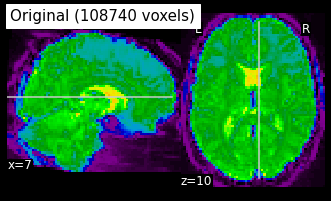

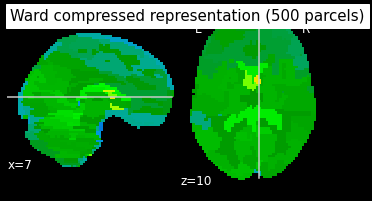

In [8]:
# Grab number of voxels from attribute mask image (mask_img_).

original_voxels = np.sum(nilearn.image.get_data(ward.mask_img_))

# Compute mean over time on the functional image to use the mean
# image for compressed representation comparisons
mean_func_img = nilearn.image.mean_img(dataset[0])

# Compute common vmin and vmax
vmin = np.min(get_data(mean_func_img))
vmax = np.max(get_data(mean_func_img))

plotting.plot_epi(mean_func_img, cut_coords=cut_coords,
                  title='Original (%i voxels)' % original_voxels,
                  vmax=vmax, vmin=vmin, display_mode='xz')

# A reduced dataset can be created by taking the parcel-level average:
# Note that Parcellation objects with any method have the opportunity to
# use a `transform` call that modifies input features. Here it reduces their
# dimension. Note that we `fit` before calling a `transform` so that average
# signals can be created on the brain parcellations with fit call.
fmri_reduced = ward.transform(dataset[0])

# Display the corresponding data compressed using the parcellation using
# parcels=1000.
fmri_compressed = ward.inverse_transform(fmri_reduced)

plotting.plot_epi(nilearn.image.index_img(fmri_compressed, 0),
                  cut_coords=cut_coords,
                  title=f'Ward compressed representation ({n_clusters} parcels)',
                  vmin=vmin, vmax=vmax, display_mode='xz')
# As you can see below, this approximation is almost good, although there
# are only 1000 parcels, instead of the original 60000 voxels